<a href="https://colab.research.google.com/github/anshu109/classification-of-african-and-asian-Elephants-Kaggle-datatset/blob/main/Asian_vs_african_elephant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Asian and Africans Elephants

In this Project, I am going to perform a Cnvolution Neural Network on a given dataset and will try to classify wheather the elephant in the image is Asian or African. But First lets import few required libraries

# Importing Required Libraries and Dependencies

In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

Here I am Using Google Colab, so I can not simply upload a folder on colab thereforeI will upload the Zip file and then extract the Zip file in folder. The Zip file contains one folder named Dataset and in that dataset folder two subfolders "train" and "test" are there. in both dubfolder there are two olders in which images of asian and african elephants  are stored

In [ ]:
# Processing the zip file of the Data
local_zip = "/content/archive.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
# Total number of images in Training
print(f"Total number of training african elephant is {len(os.listdir('/content/dataset/train/African'))}")
print(f"Total number of training asian elephant is {len(os.listdir('/content/dataset/train/Asian'))}")

# Total number of images in Validation
print(f"Total number of testing african elephant is {len(os.listdir('/content/dataset/test/African'))}")
print(f"Total number of testing asian elephant is {len(os.listdir('/content/dataset/test/Asian'))}")

Total number of training african elephant is 420
Total number of training asian elephant is 420
Total number of testing african elephant is 97
Total number of testing asian elephant is 91


# Define a Directory for each folder.

In [ ]:
# Directory with training african elephants images
train_african_dir = os.path.join("/content/dataset/train/African")

# Directory with training asian eleohants images.
train_asian_dir = os.path.join("/content/dataset/train/Asian")

# Directory with validation african elephants images
test_african_dir = os.path.join("/content/dataset/test/African")

# Directory with validation asin elephants images
test_asian_dir = os.path.join("/content/dataset/test/Asian")

In [ ]:
# Training african elephant directory
train_african_names = os.listdir(train_cats_dir)
print(train_african_names[:10])

# Training Dog directory
train_asian_names = os.listdir(train_dogs_dir)
print(train_asian_names[:10])

# Validation african elephant directory
test_african_names = os.listdir(validation_cats_dir)
print(test_african_names[:10])

# Validation asian elephant directory
test_african_names = os.listdir(validation_dogs_dir)
print(test_african_names[:10])

['af_tr148.jpg', 'af_tr275.jpg', 'af_tr161.jpg', 'af_tr6.jpg', 'af_tr246.jpg', 'af_tr129.jpg', 'af_tr113.jpg', 'af_tr72.jpg', 'af_tr261.jpg', 'af_tr56.jpg']
['as_tr386.jpg', 'as_tr78.jpg', 'as_tr126.jpg', 'as_tr23.jpg', 'as_tr94.jpg', 'as_tr299.jpg', 'as_tr118.jpg', 'as_tr363.jpg', 'as_tr134.jpg', 'as_tr33.jpg']
['af_te22.jpg', 'af_te73.jpg', 'af_te21.jpg', 'af_te26.jpg', 'af_te52.jpg', 'af_te47.jpg', 'af_te8.jpg', 'af_te13.jpg', 'af_te64.jpg', 'af_te44.jpg']
['as_te25.jpg', 'as_te66.jpg', 'as_te80.jpg', 'as_te71.jpg', 'as_te55.jpg', 'as_te59.jpg', 'as_te38.jpg', 'as_te94.jpg', 'as_te98.jpg', 'as_te89.jpg']


# Extract images from folders

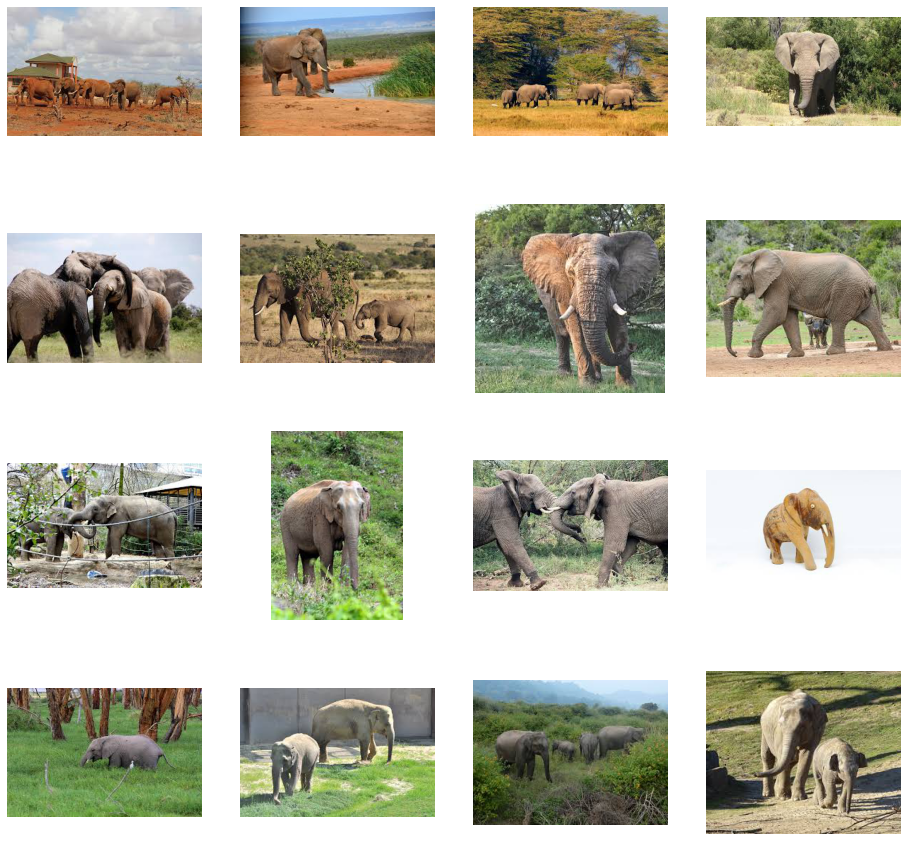

In [ ]:
# Parameters for our graph 
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_african_px = [os.path.join(train_african_dir, fname) for fname in train_african_names[pic_index-8:pic_index]]
next_asian_px = [os.path.join(train_asian_dir, fname) for fname in train_asian_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_african_px + next_asian_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Prepare for nural network model



In [ ]:
model = tf.keras.models.Sequential([
                                    # The first convolution
                                    # Input image has 3 bytes color
                                    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The sixth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed in Deep Neural Network
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")                                   
])


In [ ]:
# Summary of Neural Network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
# Compile the Model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(300, 300),
    batch_size=64,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/content/dataset/test",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/50
8/8 [==============================] - 53s 6s/step - loss: 0.7206 - accuracy: 0.4825 - val_loss: 0.6998 - val_accuracy: 0.4840
Epoch 2/50
8/8 [==============================] - 43s 5s/step - loss: 0.6942 - accuracy: 0.5066
Epoch 3/50
8/8 [==============================] - 43s 5s/step - loss: 0.6949 - accuracy: 0.5088
Epoch 4/50
8/8 [==============================] - 48s 6s/step - loss: 0.6934 - accuracy: 0.5078
Epoch 5/50
8/8 [==============================] - 43s 5s/step - loss: 0.6933 - accuracy: 0.4978
Epoch 6/50
8/8 [==============================] - 47s 6s/step - loss: 0.6941 - accuracy: 0.5078
Epoch 7/50
8/8 [==============================] - 43s 5s/step - loss: 0.6937 - accuracy: 0.4978
Epoch 8/50
8/8 [==============================] - 43s 5s/step - loss: 0.6909 - accuracy: 0.5417
Epoch 9/50
8/8 [==============================] - 48s 6s/step - loss: 0.6956 - accuracy: 0.4941
Epoch 10/50
8/8 [==============================] - 45s 5s/step - loss: 0.7050 - accuracy: 0.53

In [ ]:
# Model Accuracy
x1 = model.evaluate_generator(train_generator)
x2 = model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 59.76%     Training loss  : 0.669841
Validation Accuracy: 63.83%     Validation loss: 0.641266


In [ ]:
from keras.preprocessing import image
from google.colab import files
# Model in production
# Using google colab file system
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0]) 
  if classes[0] > 0.5:
    print(fn, "is an asian elephant")
  else:
    print(fn, "is an african elephant")

Saving as_tr7.jpg to as_tr7.jpg
[1.4779576e-19]
as_tr7.jpg is an african elephant
